In [126]:
import pandas as pd
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from sklearn.model_selection import train_test_split
import numpy as np
from datetime import datetime
from sktime.forecasting.fbprophet import Prophet
from sktime.utils.plotting import plot_series
from numpy import indices
from sktime.performance_metrics.forecasting import mean_absolute_percentage_error
from sktime.forecasting.model_selection import temporal_train_test_split
from sktime.forecasting.theta import ThetaForecaster
from sktime.forecasting.base import ForecastingHorizon
from sklearn.metrics import mean_absolute_error, r2_score
from sktime.forecasting.fbprophet import Prophet

In [5]:
df = pd.read_excel(r'Dados.xlsx', parse_dates=[0], index_col=[0])
y = df
y.resample(rule="D")
previsao = Prophet()
intervalo = 6
y_treino = y[:-intervalo]
y_teste = y.tail(intervalo)
previsao.fit(y['Vendas'])
ultimo_dia = df.index.max()
intervalo_de_tempo = ForecastingHorizon(pd.date_range(str(ultimo_dia), periods=intervalo, freq='D'), is_relative=False)
y_previsao = previsao.predict(intervalo_de_tempo)
ci = previsao.predict_interval(intervalo_de_tempo, coverage=0.9)

11:31:15 - cmdstanpy - INFO - Chain [1] start processing
11:31:15 - cmdstanpy - INFO - Chain [1] done processing


(<Figure size 1152x288 with 1 Axes>, <AxesSubplot:>)

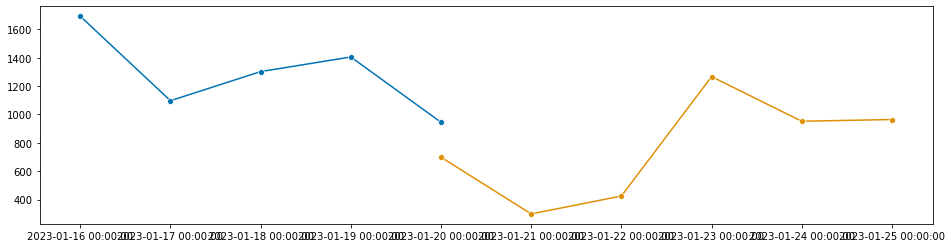

In [7]:
plot_series(y.tail(5), y_previsao)

<AxesSubplot:xlabel='Dia da Semana'>

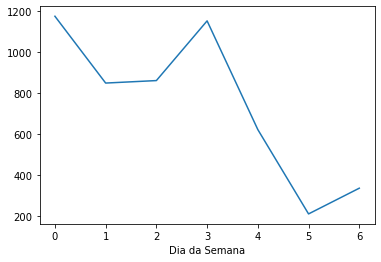

In [27]:
#Media de vendas para cada dia da semana

x = pd.read_excel(r'Dados.xlsx')

x['Dia da Semana'] = x['Data'].dt.weekday

avarage = x.groupby('Dia da Semana')['Vendas'].mean()

avarage.plot()

In [ ]:
#Aqui podemos observar um padrao que entre segunda e quarta feira temos mais vendas, esse pode ser mais um parametro para
#se usar no planejamento atraves da analise de dados